In [1]:
import pandas as pd
import numpy as np

##Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

file = "lol_data_1.csv"
data = pd.read_csv(file)

<strong>Win Percentage</strong>

In [2]:
wins = data.loc[(data["win"] == True)]
num_of_games = len(wins) 
blue_side = len(wins.loc[(data["side"]) == "Side.blue"])/num_of_games*100
red_side = len(wins.loc[(data["side"]) == "Side.red"])/num_of_games*100
first_tower = len(wins.loc[(data["first_tower"]) == True])/num_of_games*100
first_inhibitor = len(wins.loc[(data["first_inhibitor"]) == True])/num_of_games*100
first_dragon = len(wins.loc[(data["first_dragon"]) == True])/num_of_games*100
first_rift_herald = len(wins.loc[(data["first_rift_herald"]) == True])/num_of_games*100
first_baron = len(wins.loc[(data["first_baron"]) == True])/num_of_games*100
print("blue_side = %f\nred_side = %f\nfirst_tower = %f\nfirst_inhibitor = %f\nfirst_dragon = %f\nfirst_rift_herald = %f\nfirst_baron = %f"%(blue_side,red_side,first_tower,first_inhibitor,first_dragon,first_rift_herald,first_baron))

blue_side = 54.516129
red_side = 45.483871
first_tower = 66.129032
first_inhibitor = 72.258065
first_dragon = 61.290323
first_rift_herald = 54.516129
first_baron = 42.903226


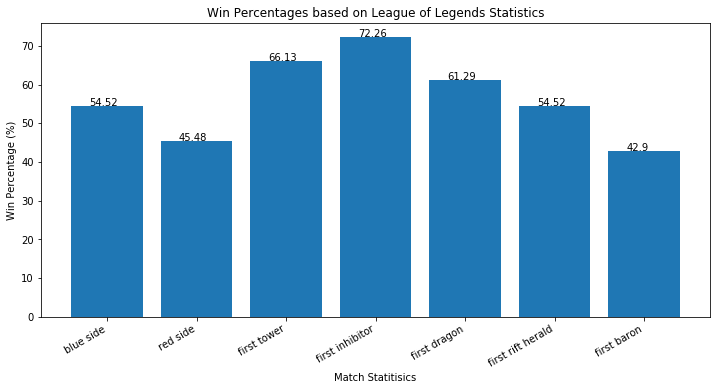

In [3]:
x = ("blue side", "red side","first tower", "first inhibitor", "first dragon", "first rift herald", "first baron")
y = [blue_side, red_side,first_tower, first_inhibitor, first_dragon, first_rift_herald,first_baron]
label = np.arange(len(x))
plt.bar(label, y, align='center')
plt.gcf().set_size_inches(12, 6)
plt.xticks(label, x)
plt.xlabel('Match Statitisics')
plt.ylabel('Win Percentage (%)')
plt.title('Win Percentages based on League of Legends Statistics')
for x, y in enumerate(y):
    plt.text(x-0.2, y, str(round(y,2)))
plt.gcf().autofmt_xdate()
plt.show()

This graph represents how getting the first objective or being on a certain side of the map affects the win rate of the game. These statistics were pulled using the a python program that pulls data using Riot Game's API that allows users to analyze matches. The following graphs listed on this page was made by analyzing 310 games. 

<strong>Number of certain objectives controlled</strong>

In [4]:
tower_kills = wins["tower_kills"].value_counts().sort_index().to_dict()
inhibitor_kills = wins["inhibitor_kills "].value_counts().sort_index().to_dict()
dragon_kills = wins["dragon_kills"].value_counts().sort_index().to_dict()
rift_herald_kills = wins["rift_herald_kills"].value_counts().sort_index().to_dict()
baron_kills = wins["baron_kills"].value_counts().sort_index().to_dict()
print("towers killed: " + str(tower_kills) +"\ninhibitors killed: "+ str(inhibitor_kills) + "\ndragons killed: " + str(dragon_kills) + "\nrift heralds killed: " + str(rift_herald_kills) + "\nbaron killed: " + str(baron_kills))

towers killed: {0: 15, 1: 2, 2: 2, 3: 8, 4: 10, 5: 18, 6: 12, 7: 38, 8: 49, 9: 57, 10: 45, 11: 54}
inhibitors killed: {0: 59, 1: 98, 2: 91, 3: 42, 4: 17, 5: 2, 7: 1}
dragons killed: {0: 20, 1: 24, 2: 96, 3: 90, 4: 64, 5: 15, 8: 1}
rift heralds killed: {0: 121, 1: 131, 2: 58}
baron killed: {0: 164, 1: 126, 2: 19, 3: 1}


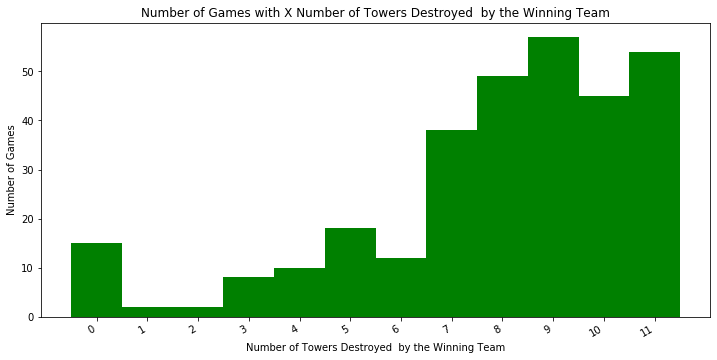

Average is 7.893548387096774 Towers Destroyed 


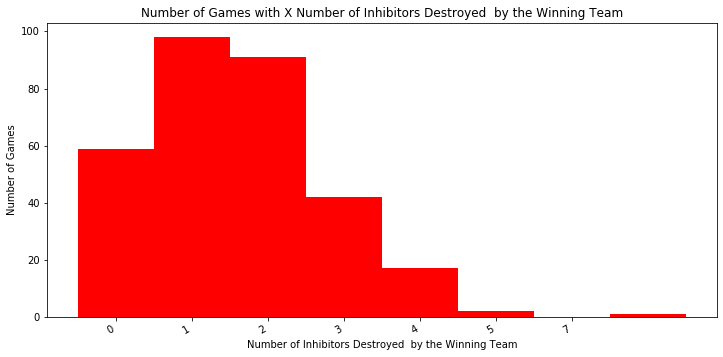

Average is 1.5838709677419356 Inhibitors Destroyed 


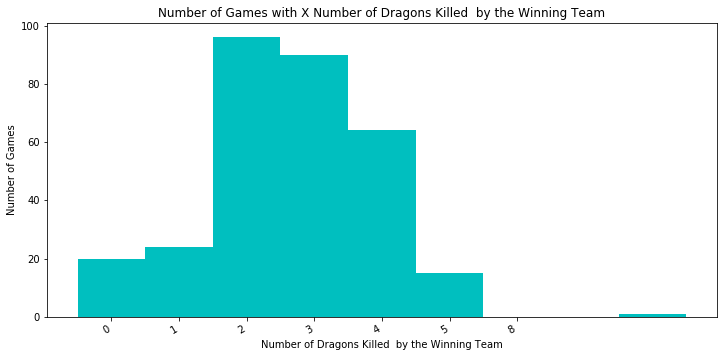

Average is 2.661290322580645 Dragons Killed 


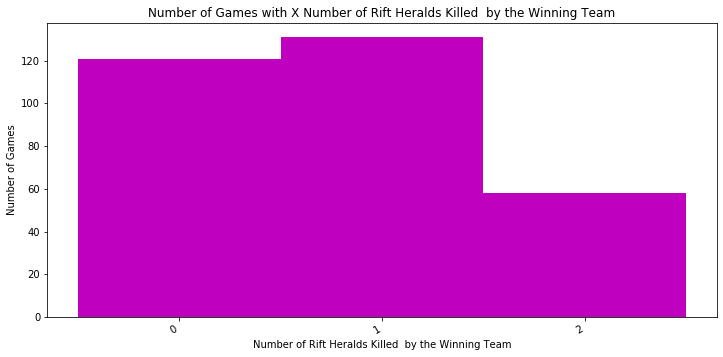

Average is 0.7967741935483871 Rift Heralds Killed 


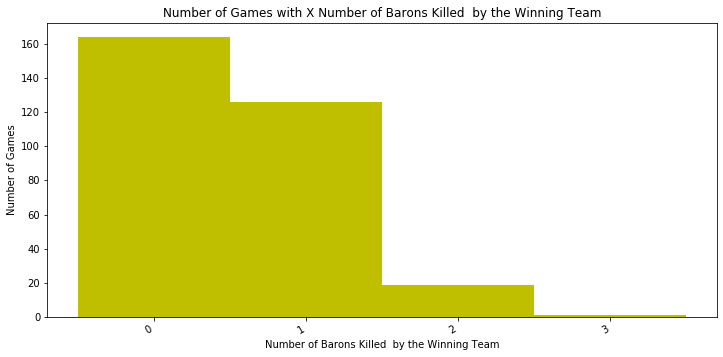

Average is 0.5387096774193548 Barons Killed 


In [5]:
def graph(category_str, category, color):
    plt.bar(category.keys(), category.values(), 1, color=color, align='center')
    label = np.arange(len(category))
    plt.xticks(label, category.keys())
    plt.gcf().set_size_inches(12, 6)
    plt.title('Number of Games with X Number of '+ category_str + ' by the Winning Team')
    plt.ylabel('Number of Games')
    plt.xlabel('Number of '+ category_str + ' by the Winning Team')
    plt.gcf().autofmt_xdate()
    plt.show()
    total = 0
    sums = 0
    for x in category:
        total+=category[x]
        sums+=(category[x]*x)
    print("Average is " + str(sums/total) + " " + category_str)
    
graph("Towers Destroyed ", tower_kills, 'g')
graph("Inhibitors Destroyed ", inhibitor_kills, 'r')
graph("Dragons Killed ", dragon_kills, 'c')
graph("Rift Heralds Killed ", rift_herald_kills, 'm')
graph("Barons Killed ", baron_kills, 'y')

All of these graphs show how many of certain objectives were destroyed or taken by a winning team in a game. The x-axis is represented by the number of a certain objective is destroyed or taken by a winning team, while the y-axis shows how many games had a winning team with that many objectives controlled. Towers in League of legends are building that can be destroyed which protects a team's base. Inhibitors are buildings that are located closer to a team's base which offers the team that destroys the enemies inhibitor a buff that creates and sends stronger minions that assists in fights. Dragon is neutral monsters which spawns in intervals at a time, and once killed gives a buff to the team that killed the dragon. Rift Herald is a neutral monster which also spawns at a interval at a time before the 20 min mark of the game limiting to only up to 2 Rift Heralds. Once killed, the winning team is able to spawn a Rift Herald to assist their team. Baron is also neutral monster that can be killed by either teams. It offers a buff to the winning team via their stats and their minions that help win the game. All of these objectives gives more gold to the team that conqueor them which allow them to buy more items sooner to push for a win. 